# Word2Vec Exercise Code

### Dataset(10 sentences) and codes are from https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/nlp/word2vec_tensorflow.ipynb




# Dataset

There are 10 sentences to create word vectors

In [25]:
import pandas as pd
import numpy as np

In [26]:
# data import 
df = pd.read_csv('Depression Expression_all.csv')
#df

In [27]:
list_2d= df.values.tolist()
mylist = np.concatenate(list_2d).tolist()
#mylist

# Remove Simple Words (1 word)

In [28]:
expressions = []
for expression in mylist:
    if (expression.find(" ") != -1 ): #expression with space
        expressions.append(expression)
expressions

['가슴 아프다',
 '가치 없다',
 '갇힌 것 같다',
 '기대할 것이 없다',
 '기분이 가라앉는다',
 '기분이 나쁘다',
 '기분이 별로다',
 '기분이 안좋다',
 '기분이 처진다',
 '더 내려갈 데가 없다',
 '마음 아프다',
 '막다른 느낌',
 '바닥까지 내려간다',
 '방법이 없다',
 '방향을 잃다',
 '살기 싫다',
 '생각하기도 싫다',
 '앞이 캄캄하다',
 '외롭다. ',
 '죽고 싶다',
 '죽을 맛이다',
 '할 수 없다',
 '행복하지 않다',
 '희망이 없다',
 '감정이 안 느껴진다',
 '감흥 없다',
 '관심 없다',
 '관심이 줄다',
 '나가기 싫다',
 '누워 있다',
 '덧 없다',
 '될대로 되라',
 '만나기 귀찮다',
 '부질 없다',
 '생각 없다',
 '소용 없다',
 '신경 쓰지 않는다',
 '신이 안난다',
 '안 하려 하다',
 '억지로 하다',
 '욕구가 준다',
 '움직이기 싫다',
 '일하기 힘들다',
 '재미 없다',
 '즐겁지 않다',
 '지친다 ',
 '집에만 있다',
 '하기 싫다',
 '할수 없다',
 '흥미 없다',
 '끼니를 거르다',
 '또 먹어버렸다',
 '많이 먹다',
 '맛을 모르겠다',
 '맛이 없다',
 '먹기 귀찮다',
 '먹기 싫다',
 '몸이 불었다',
 '배가 빵빵하다',
 '배가 안 고프다',
 '배를 채우다',
 '살이 붙다',
 '살이 빠지다',
 '살이 찌다',
 '소화가 안 된다',
 '식욕 제어가 안된다',
 '식욕 터진다',
 '식욕이 늘다',
 '식욕이 없다',
 '식욕이 줄다',
 '억지로 먹는다',
 '옷이 맞지 않는다',
 '옷이 헐렁해졌다',
 '음식이 땡긴다',
 '입 맛 없다',
 '입 터졌다',
 '입맛이 늘다',
 '깊게 못 잔다',
 '꾸벅꾸벅 졸다',
 '눈꺼풀이 무겁다',
 '눈만 감고 있다',
 '늦게 일어난다',
 '다시 자기 힘들다',
 '뜬 눈으로 지새다',
 '못 일어나다',
 '못 자다',
 '밤을 새다',
 '새벽

# Morpheme Analysis in Korean - Konlpy

In [29]:
from konlpy.tag import Okt

okt = Okt()
corpus = []

for i in expressions:
    corpus.append(okt.morphs(i))
    
corpus

[['가슴', '아프다'],
 ['가치', '없다'],
 ['갇힌', '것', '같다'],
 ['기대할', '것', '이', '없다'],
 ['기분', '이', '가라앉는다'],
 ['기분', '이', '나쁘다'],
 ['기분', '이', '별로', '다'],
 ['기분', '이', '안좋다'],
 ['기분', '이', '처진다'],
 ['더', '내려갈', '데', '가', '없다'],
 ['마음', '아프다'],
 ['막', '다른', '느낌'],
 ['바닥', '까지', '내려간다'],
 ['방법', '이', '없다'],
 ['방향', '을', '잃다'],
 ['살기', '싫다'],
 ['생각', '하기도', '싫다'],
 ['앞', '이', '캄캄하다'],
 ['외롭다', '.'],
 ['죽고', '싶다'],
 ['죽', '을', '맛', '이다'],
 ['할', '수', '없다'],
 ['행복하지', '않다'],
 ['희망이', '없다'],
 ['감정', '이', '안', '느껴진다'],
 ['감흥', '없다'],
 ['관심', '없다'],
 ['관심', '이', '줄다'],
 ['나가기', '싫다'],
 ['누워', '있다'],
 ['덧', '없다'],
 ['될대로', '되라'],
 ['만나기', '귀찮다'],
 ['부질', '없다'],
 ['생각', '없다'],
 ['소용', '없다'],
 ['신경', '쓰지', '않는다'],
 ['신', '이', '안', '난다'],
 ['안', '하려', '하다'],
 ['억지로', '하다'],
 ['욕구', '가', '준다'],
 ['움직이기', '싫다'],
 ['일', '하기', '힘들다'],
 ['재미', '없다'],
 ['즐겁지', '않다'],
 ['지친다'],
 ['집', '에만', '있다'],
 ['하기', '싫다'],
 ['할수', '없다'],
 ['흥미', '없다'],
 ['끼니', '를', '거르', '다'],
 ['또', '먹어', '버렸다'],
 ['많이', '먹다'],
 ['맛', '을',

# Remove Stop Words 

    * Stop words: set of commonly used words in any language
    
    In order for effiency of creating word vector, we will remove commonly used words.



In [30]:
def remove_stop_words(corpus):
    stop_words = ['이','을','를','가','는','나','내','만','에게','다','.']
    results = []
    
    for text in corpus:
        for i in range(2):
            for stop_word in stop_words:
                     if stop_word in text:
                            text.remove(stop_word) # ['기분', '이', '가라앉는다'], -> ['기분', '가라앉는다']
#             results.append(" ".join(text))# ['기분', '가라앉는다'] -> ['기분 가라앉는다']
        results.append(text)
    return results

result_data = remove_stop_words(corpus)

for i in range (2):
    for x in result_data:
        if(len(x)==1):
            result_data.remove(x)

result_data 

# result_data = [i for i in result_data if i not in rm_set]

# result_data = list(set(result_data))

[['가슴', '아프다'],
 ['가치', '없다'],
 ['갇힌', '것', '같다'],
 ['기대할', '것', '없다'],
 ['기분', '가라앉는다'],
 ['기분', '나쁘다'],
 ['기분', '별로'],
 ['기분', '안좋다'],
 ['기분', '처진다'],
 ['더', '내려갈', '데', '없다'],
 ['마음', '아프다'],
 ['막', '다른', '느낌'],
 ['바닥', '까지', '내려간다'],
 ['방법', '없다'],
 ['방향', '잃다'],
 ['살기', '싫다'],
 ['생각', '하기도', '싫다'],
 ['앞', '캄캄하다'],
 ['죽고', '싶다'],
 ['죽', '맛', '이다'],
 ['할', '수', '없다'],
 ['행복하지', '않다'],
 ['희망이', '없다'],
 ['감정', '안', '느껴진다'],
 ['감흥', '없다'],
 ['관심', '없다'],
 ['관심', '줄다'],
 ['나가기', '싫다'],
 ['누워', '있다'],
 ['덧', '없다'],
 ['될대로', '되라'],
 ['만나기', '귀찮다'],
 ['부질', '없다'],
 ['생각', '없다'],
 ['소용', '없다'],
 ['신경', '쓰지', '않는다'],
 ['신', '안', '난다'],
 ['안', '하려', '하다'],
 ['억지로', '하다'],
 ['욕구', '준다'],
 ['움직이기', '싫다'],
 ['일', '하기', '힘들다'],
 ['재미', '없다'],
 ['즐겁지', '않다'],
 ['집', '에만', '있다'],
 ['하기', '싫다'],
 ['할수', '없다'],
 ['흥미', '없다'],
 ['끼니', '거르'],
 ['또', '먹어', '버렸다'],
 ['많이', '먹다'],
 ['맛', '모르겠다'],
 ['맛', '없다'],
 ['먹기', '귀찮다'],
 ['먹기', '싫다'],
 ['몸', '불었다'],
 ['배', '빵빵', '하다'],
 ['배', '안', '고프다'],
 ['배', '채우

# Define Tensorflow Graph

In [36]:
f_in=open('depression_ex','r')
f_out=open('depression_ex.csv','w')

for line in f_in:
    line_replace=line.replace("^",",")
    f_out.write(line_replace)
    
f_in.close()
f_out.close()

In [59]:
# Now the hidden layer (W1 + b1) is actually the word look up table


w2v_df = pd.DataFrame(vectors, columns = ['word','x1', 'x2'])
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df


,word,x1,x2
0,안,-0.161829,0.004027
1,싫다,0.201898,0.008814
2,힘들다,0.230425,-0.091682
3,못,-0.072294,0.223353
4,기분,0.193419,0.186806
...,...,...,...
223,떨어지다,-0.055044,0.143604
224,정리,0.126112,0.226567
225,정신,0.117218,-0.124787
226,사납다,0.143357,0.131201


In [64]:
vectors = []
for i in range(len(w2v_df)):
    vectors.append(w2v_df.iloc[i].to_list())

for i in range(len(w2v_df)):
    del vectors[i][0]

vectors

[[-0.16182944, 0.004027237],
 [0.20189822, 0.008813693],
 [0.23042537, -0.09168248],
 [-0.07229379, 0.223353],
 [0.1934187, 0.18680605],
 [0.14768015, -0.017402006],
 [-0.11007108, -0.15478727],
 [0.15422404, 0.090402186],
 [-0.15141769, 0.18614669],
 [-0.055062477, -0.16761978],
 [0.08408852, -0.24555276],
 [0.062014114, -0.016234761],
 [-0.031963907, -0.19133137],
 [0.18991798, 0.10524857],
 [-0.2269199, 0.24460644],
 [0.1809354, 0.022263015],
 [-0.20221621, -0.24692394],
 [0.09259493, 0.06966485],
 [-0.24544673, -0.05187401],
 [-0.08140707, -0.18258558],
 [0.20639108, -0.13007618],
 [0.078111604, 0.093230814],
 [0.22370946, -0.035089657],
 [0.18912153, -0.08815234],
 [-0.0768177, -0.20516449],
 [-0.14720741, 0.10878162],
 [-0.07630927, -0.075762056],
 [0.08659339, -0.10030266],
 [0.116816774, -0.18026525],
 [0.13425343, -0.08740828],
 [-0.21209379, -0.0058313166],
 [-0.13117144, 0.24389255],
 [-0.13559373, 0.018089108],
 [-0.04375641, -0.101310395],
 [-0.14841011, 0.20363641],
 [0.0

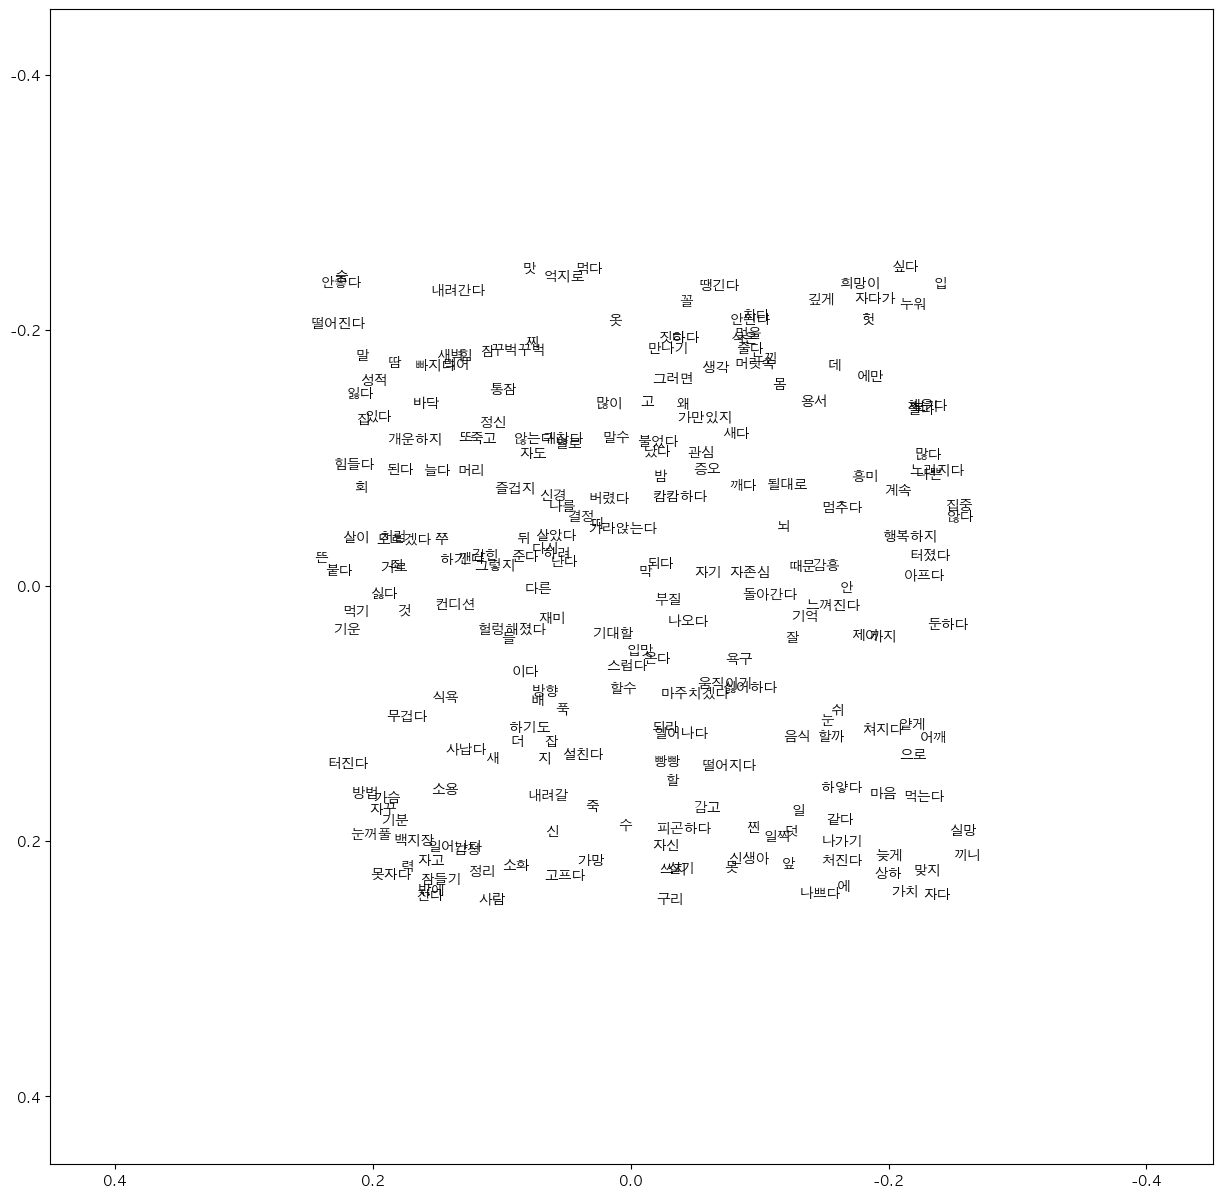

In [79]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = -0.7
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (15,15)

plt.show()

from gensim.models import Word2Vec
model = Word2Vec(sentences=result_data, size=100, window=3, min_count=1, workers=4, sg=1)


model_result = model.wv.most_similar("몸")
print(model_result)

[('살았다', 0.5144048929214478), ('마주치겠다', 0.46823009848594666), ('먹어', 0.42793008685112), ('채우다', 0.39797598123550415), ('자다가', 0.39224252104759216), ('만나기', 0.35056090354919434), ('덧', 0.3488854467868805), ('깨다', 0.3463616669178009), ('관심', 0.33237943053245544), ('짓다', 0.33226996660232544)]